In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 100kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=6e141187d203ca4ab9e1780c33bcfbf9b7f0f7d3c0c273bc32d93ea014d43022
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


128分數: [-0.1068705   0.07829035  0.02323501 -0.05516524 -0.18794051 -0.00080293
 -0.0789268  -0.0305036   0.15956585 -0.14944097  0.17917928 -0.0650579
 -0.22372465 -0.00246124 -0.06655902  0.22605422 -0.18099277 -0.20515612
 -0.00402452  0.03284764  0.07336682  0.06388276 -0.04367752  0.01641922
 -0.11215882 -0.34289992 -0.0861944  -0.00172971 -0.0432274  -0.06061577
 -0.01531945  0.08499551 -0.15116072  0.00324638  0.11322569  0.14039142
 -0.0106275  -0.10529579  0.13240197 -0.01659798 -0.33941999  0.02230443
  0.09798367  0.23938817  0.1588919   0.00830324 -0.04562962 -0.14738068
  0.13016568 -0.18976979  0.0707469   0.17589742  0.09756915  0.06478001
  0.03330024 -0.1430382   0.02491804  0.12725201 -0.11645284 -0.06317697
  0.08880446 -0.0397286   0.06168825 -0.15000498  0.15773523  0.05786056
 -0.11202973 -0.2507472   0.14024554 -0.1675681  -0.10351978  0.10265002
 -0.14929157 -0.22267249 -0.28116676  0.01267311  0.27512255  0.13725747
 -0.14381181  0.05508566  0.077112   -0.00243

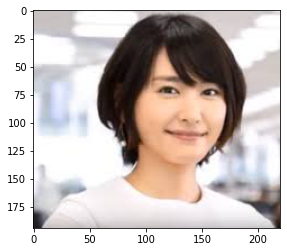

In [3]:

import face_recognition
import matplotlib.pyplot as plt
%matplotlib inline
img = face_recognition.load_image_file("新垣結衣.jpg")
en = face_recognition.face_encodings(img)[0]
print("128分數:", en)
plt.imshow(img)

In [ ]:
import glob
import numpy as np

fs = glob.glob("*.png") + glob.glob("*.jpg")
names = list(map(lambda s:s.split(".")[0], fs))
def get_encodings(fn):
    img = face_recognition.load_image_file(fn)
    en = face_recognition.face_encodings(img)[0]
    return en
encodings = list(map(get_encodings, fs))
print("names:", names)
print("encoding:", encodings)

網址:https://obs.line-scdn.net/0hhFAj_lruN2l8ExwEe2xIPkZFNAZPfyRqGCVmaj99aV0EIiA-EHZxXFATbAlXJnA3EiF7ClgULFgBJnc9QHVx/w644


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


跟 蔡英文 的距離: 0.6387454746347454
跟 韓國瑜 的距離: 0.7435382637348351
跟 阿信 的距離: 0.6037059288210611
跟 新垣結衣 的距離: 0.4090017598304109
[最近]: 新垣結衣
--------------------------------------------------
跟 蔡英文 的距離: 0.701412694539178
跟 韓國瑜 的距離: 0.8044825952787054
跟 阿信 的距離: 0.7302297453176436
跟 新垣結衣 的距離: 0.568231748041965
[最近]: 新垣結衣
--------------------------------------------------


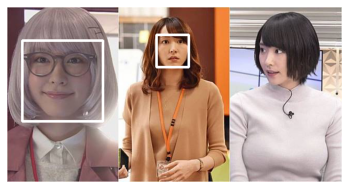

In [7]:
# https://github.com/ageitgey/face_recognition/blob/master/examples/facerec_from_webcam_faster.py
# argmin: 最小值的索引 argmax: 最大值的索引
import requests
import cv2
url = input("網址:")
# stream: 以檔案方式回傳答案 
# verify: 不要跟我說不安全
response = requests.get(url, stream=True, verify=False)
img = face_recognition.load_image_file(response.raw)
people = face_recognition.face_encodings(img)
locs = face_recognition.face_locations(img)
for person, (top, right, bottom, left) in zip(people, locs):
    # cv2.rectangle(圖片, 左上, 右上, bgr, 粗細)
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), 3)
    ds = face_recognition.face_distance(person, encodings)
    for n, d in zip(names, ds):
        print("跟", n, "的距離:", d)
    print("[最近]:", names[ds.argmin()])
    print("-" * 50)
plt.axis("off")
plt.imshow(img)